# Rogun HPP - Setup Basemaps

## description of procedure

This procedure prepares Project Basemaps from CAD topography and project layout data, and is intended to provide necessary input to the Hydropower Waterways Decision Support System (Waterways DSS), along with the Alignments module:
- basemaps for feasibilty and siting analysis
- platform for collecting and visualizing available site information, with same coordinate system, at same scale and at suitable resolution.

The Setup Baseamp procedure reads in a DXF file from CAD, which must contain topography as either a TIN, contours or points.

Expected outputs of Setup Basemaps procedure:
* DEM raster suitable for waterways DSS alignment interrogation 
* terrain relief map 
* hillslope map
* project layout map
* hydrologic map with watersheds and watercourses
* satellite DEM map for cross-checking project topography
* reporting of topographic inputs, outputs, differences between topographic inputs and processing

Required inputs for Setup Basemaps procedure:
* CAD DWG with topography as  (contours, TIN or points) as ./data/in
* CAD topography as DXF (contours, TIN or points) using e.g. Sketchup as ./data/in
* project layout (PDF) in ./data/in/images
* project name (which corresponds to project folder) as Jupyter input
* project coordinate system (or assumption as e.g. pseudo Mercator) as Jupyter input
* coordinate bounds (grass region), typically same as bound of suitably cropped project layout, as Jupyter input
* layer(s) with topographic data -> by inspection of imported DXF, as Jupyter input
* layer(s) with stream data (if applicable) -> by inspection of imported DXF, as Jupyter input
* project layout (PNG) suitably cropped and rotated such that north is y-axis of layout, in ./data/in/images

Using procedure in a Jupyter Notebook Basemap template:
1. call grass setup from API
2. define basic input data
3. report basic input data
4. add required input data from report (layers with topographic and stream data(if applicable))
5. call Setup Basemaps procedure from API
6. display Basemaps
7. report on Basemaps
8. export Basemaps as PNG (e.g. for Google Maps, plotly)

Preparation of DXF from CAD DWG containing topogrpay
1. check that topography has 'z' attributed to topographic entities
2. identify layer(s) containing topography and streams (if available)
3. export topography and stream layers as DXF

Preparation of PNG from Project layout PDF
1. Check project layout PDF for correctness and completeness
2. Take screenshot (PNG) of project layout PDF (works best for me)
3. Upload screenshot PNG to jk-2-gce-gis project data folder ./data/in/images
4. View PNG with qgis (add raster layer) and determine required rotation (see rotation field at bottom)
5. Use 'convert -rotate "-nn.n" screenshot.png screenshot_r.png’ to rotate image 
6. Download rotated PNG  
7. Crop PNG image ‘by eye’ using image viewer and record coordinate bounds
8. Upload cropped screenshot PNG to jk-2-gce-gis project data folder
9. Run grass procedure ‘project layout map using recorded coordinate bounds
10. Make fine adjustments of coordinate bounds using r.region 

Output grass raster layers:
* 'project'/grassdata/Permeanent/cells/terrain_dem
* 'project'/grassdata/Permeanent/cells/terrain_relief
* 'project'/grassdata/Permeanent/cells/terrain_hillslope
* 'project'/grassdata/Permeanent/cells/terrain_hydrology
* 'project'/grassdata/Permeanent/cells/rpoject_layout

Output grass raster tiff data files:
 * to be added

Output grass image png data files:
* 'project'/data/out/image/*.png


## grass setup

In [55]:
# import Basemap API
from basemap import *
from basemap import Basemap

## project setup

In [56]:
# define required user input data for project
project = 'RogunHPP'
crs = 'EPSG:3857'  #WGS84 Pseudo Mercator
n,s,e,w = 24797, 20796, 28600, 25597  #bounds of topog
#n,s,e,w = 25020, 20880, 28490, 26040  #project layout
res = 2  #10  #sets raster resolution

In [57]:
# instantiate Basemap instance for project
map = Basemap(project)


# fix this documentation & state which method(s) it applies to !!!                                          !!!
# all grass functions (except map) ???
#        dbg=0 in function parameters -> show error messages only
# and dbg=0 doesn't work for "map.read_grass('d.vect', ..."                                                 Fix

# somewhere (probably best in description of procedure above) a list of all ouputs is required
#   include e.g. topog_basin_vect

project: RogunHPP

 
basemapy.py - Basemap Module
    prepares a set of raster basemaps for a project
       basemaps are suitable for geospatial querying from alignments
       basemaps are suitable for importing as layers into qgis

Usage:
    1. map = Basemap(project)                              instantiate a project basemap
    2. map.inspect_dxf(project_dir, topogDXF)              examine DXF data containing topography
    3. map.import_dxf(project_dir, topogDXF, layers_dxf)   import DXF data layer containing topography
    4. map.rasterize_vect_lines                            rasterize vector data - sparse data, 
                                                                                   irregular bounds
       OR map.rasterize_vect_faces                                               - dense date, regular bounds
       OR map.rasterize_vect_using_points                                        - sparse data, regular bounds
    5. map.hillslope()                            

In [58]:
# define required input data files for project
##topogDXF='data/in/Topography2m_R5_reduced_5m.dxfced_5m.dxf'  #'scalloped' appearance of topography
#topogDXF = 'data/in/Topografy2m_R5full.dxf'  #good ad small and large scale
topogDXF = 'data/in/Drone2018InclOld.topoTIN.dxf'  #good ad small and large scale

layoutPDF = 'data/in/images/RogunHPP.Layout_c_r.png'
geologyPDF = 'data/in/images/RogunHPP.GeologicalMap.png'

In [59]:
# define output data files for project
# x,y,z csv data file from topographiuc raster DEM
topogCSV = 'data/out/RasterDEM.csv'
# csv data file with polylines (boundaries) from wattershed boundaries
watershedsCSV = 'data/out/Watersheds.csv'
watershedsDXF = 'data/out/Watersheds.dxf'

In [60]:
# open mapset for project (create mapset if it doesn't exist)
#  can be moved to API class constructor if parameters are passed to 'map' at instantiation            #JK ToDo
mapset_loc, rcfile = map.grass_mapset(crs)

grass -c EPSG:3857 -e /home/kaelin_joseph/projects/RogunHPP//grassdata/RogunHPP
The location RogunHPP already exists


In [61]:
# set grass region for project
#  can be moved to API class constructor if parameters are passed to 'map' at instantiation            #JK ToDo
#    two methods are needed
#    1) 'reset' bounds and res to project setting
#    2) zoom to bounds and res in calling parameters
g.region(n=n,s=s,e=e,w=w, res=res)

Module('g.region')

In [62]:
# report grass setup
print('\n' 'grass environment:')
print(grass.gisenv())

# report grass coordinate system
print('\n' 'coordinate system:')
print(map.read_grass('g.proj', flags = 'jf'))

# report grass region
print('\n' 'grass mapset region:')
print(g.region(flags='p',stdout_=PIPE).outputs.stdout.decode())


grass environment:
{u'MAPSET': u'PERMANENT', u'GISDBASE': u'/home/kaelin_joseph/projects/RogunHPP//grassdata', u'LOCATION_NAME': u'RogunHPP'}

coordinate system:
('+proj=merc +lat_ts=0.0 +lon_0=0.0 +x_0=0.0 +y_0=0 +k=1.0 +no_defs +a=6378137 +rf=298.257223563 +towgs84=0.000,0.000,0.000 +to_meter=1\n', '')

grass mapset region:
projection: 99 (Mercator)
zone:       0
datum:      wgs84
ellipsoid:  wgs84
north:      24797
south:      20796
west:       25597
east:       28600
nsres:      1.99950025
ewres:      1.99933422
rows:       2001
cols:       1502
cells:      3005502



In [63]:
# remove any existing raster masks
#  make this part of basemap class initiation
!r.mask -r


ERROR: No existing MASK to remove


## read in DXF data file containing topogaphy

In [64]:
# inspect layers in DXF data file to be read in
map.inspect_dxf(topogDXF)

Layer 1: 0
Layer 2: 3d flächen
Layer 3: c-dgm
Layer 4: c-dgm ränder



In [65]:
# import topography data from DXF data file 
# define layers to be used to extract topography
layers_dxf = 'c-dgm, c-dgm ränder'
map.import_dxf(topogDXF, layers_dxf, dbg=0)


import_dxf completed


In [66]:
# report of imported DXF
#  comment out individual reporting as desired

# report imported DXF layers
print(map.read_grass("v.info", map='topog_vect', layer=layers_dxf, verbose=True)[0].decode()) 

# report entities in imported DXF layers
out = map.read_grass("v.db.select", map='topog_vect')[0].splitlines()
for line in range(0,5):
    print(out[line])

# report categories in imported DXF layers
print('\n')
print(map.read_grass("v.category", input='topog_vect', layer='-1', option='report', verbose=True)[0].decode()) 

# report coordinatesin imported DXF layers
#   adjust range as desired
out = map.read_grass("v.report", map='topog_vect', layer='-1', option='coor', verbose=True)[0].splitlines()
for line in range(0,1):
    print(out[line])

# report on attributes stored in grass sqlite database
print('\n')
print(map.read_grass("v.db.connect", map='topog_vect', flags='c', verbose=True)[0].decode()) 

 +----------------------------------------------------------------------------+
 | Name:            topog_vect                                                |
 | Mapset:          PERMANENT                                                 |
 | Location:        RogunHPP                                                  |
 | Database:        /home/kaelin_joseph/projects/RogunHPP//grassdata          |
 | Title:           topog_vect                                                |
 | Map scale:       1:2400                                                    |
 | Name of creator: kaelin_joseph                                             |
 | Organization:    GRASS Development Team                                    |
 | Source date:                                                               |
 | Timestamp (first layer): none                                              |
 |----------------------------------------------------------------------------|
 | Map format:      native              

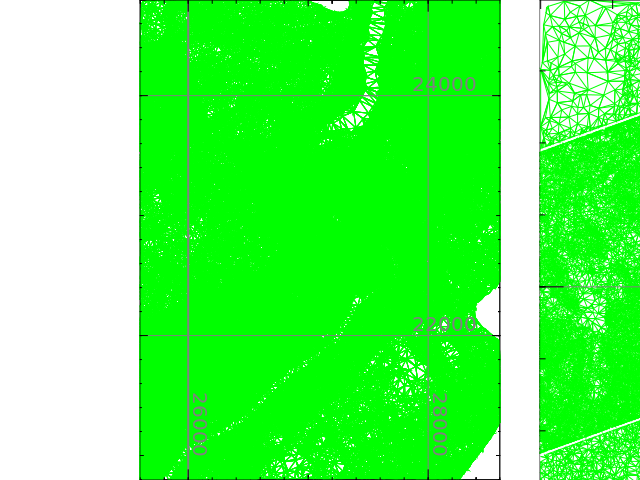

In [68]:
# display topography vector data
output_image = 'data/out/images/topog_vect.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=2, width=1080, height=720, overwrite=True)
map.read_grass("d.vect", map='topog_vect', color='green')
# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

## convert vector data with DXF topography to raster DEM

In [14]:
# convert vector DXF data to raster DEM
# testing
#map.rasterize_vect_lines(dbg=1)          # ERROR
#map.rasterize_vect_faces(dbg=1)          # NG - sparse data
#map.rasterize_vect_using_points(npoints=12, power=2, dbg=1)    # OK
map.rasterize_vect_using_points(npoints=12, power=2, dbg=1)

         overwritten
   2   5   8  11  14  17  20  23  26  29  32  35  38  41  44  47  50  53  56  59  62  65  68  71  74  77  80  83  86  89  92  95  98 100
Building topology for vector map <topog_vect_points@PERMANENT>...
Registering primitives...
1204348 primitives registered400     500     600     700     800     900    1000    1100    1200    1300    1400    1500    1600    1700    1800    1900    2000    2100    2200    2300    2400    2500    2600    2700    2800    2900    3000    3100    3200    3300    3400    3500    3600    3700    3800    3900    4000    4100    4200    4300    4400    4500    4600    4700    4800    4900    5000    5100    5200    5300    5400    5500    5600    5700    5800    5900    6000    6100    6200    6300    6400    6500    6600    6700    6800    6900    7000    7100    7200    7300    7400    7500    7600    7700    7800    7900    8000    8100    8200    8300    8400    8500    8600    8700    8800    8900    9000    9100    9200    9300    94

In [15]:
# report of vector lines
#  comment out individual reporting as desired

# report imported DXF layers
print(map.read_grass("v.info", map='topog_vect_points', layer=layers_dxf, verbose=True)[0].decode()) 

# # report entities in imported DXF layers
# #   adjust range as desired
# out = map.read_grass("v.db.select", map='topog_vect_points')[0].splitlines()
# for line in range(0,5):
#     print(out[line])

# report categories in imported DXF layers
print('\n')
print(map.read_grass("v.category", input='topog_vect_points', layer='-1', option='report', verbose=True)[0].decode()) 

# report coordinatesin imported DXF layers
#   adjust range as desired
out = map.read_grass("v.report", map='topog_vect_points', layer='-1', option='coor', verbose=True)[0].splitlines()
for line in range(0,1):
    print(out[line])

# report on attributes stored in grass sqlite database
print('\n')
print(map.read_grass("v.db.connect", map='topog_vect_points', flags='c', verbose=True)[0].decode()) 

 +----------------------------------------------------------------------------+
 | Name:            topog_vect_points                                         |
 | Mapset:          PERMANENT                                                 |
 | Location:        RogunHPP                                                  |
 | Database:        /home/kaelin_joseph/projects/RogunHPP//grassdata          |
 | Title:           topog_vect                                                |
 | Map scale:       1:2400                                                    |
 | Name of creator: kaelin_joseph                                             |
 | Organization:    GRASS Development Team                                    |
 | Source date:                                                               |
 | Timestamp (first layer): none                                              |
 |----------------------------------------------------------------------------|
 | Map format:      native              

In [16]:
# report of raster DEM

print(map.read_grass("r.info", map='topog_rast_resamp')[0].decode()) 

print(map.read_grass("r.report", map='topog_rast_resamp', units='h,p', nsteps=10)[0].decode()) 

print(map.read_grass("r.univar", map='topog_rast_resamp')[0].decode()) 


 +----------------------------------------------------------------------------+
 | Map:      topog_rast_resamp              Date: Thu Jan 31 14:07:00 2019    |
 | Mapset:   PERMANENT                      Login of Creator: kaelin_joseph   |
 | Location: RogunHPP                                                         |
 | DataBase: /home/kaelin_joseph/projects/RogunHPP//grassdata                 |
 | Title:                                                                     |
 | Timestamp: none                                                            |
 |----------------------------------------------------------------------------|
 |                                                                            |
 |   Type of Map:  raster               Number of Categories: 0               |
 |   Data Type:    DCELL                                                      |
 |   Rows:         2001                                                       |
 |   Columns:      1502                 

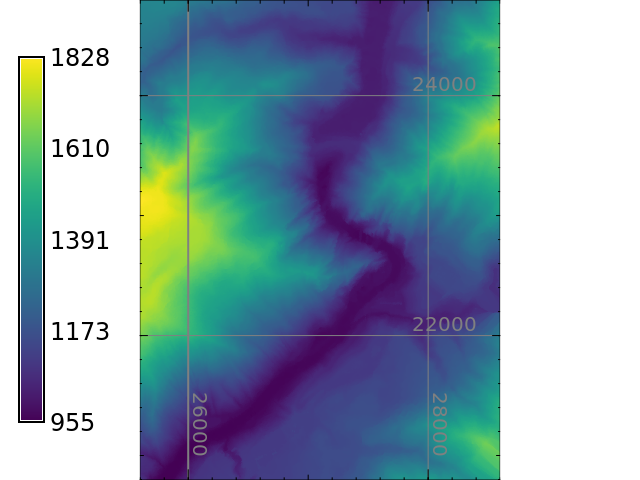

In [17]:
# display topography raster DEM
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/topog_rast.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=2, width=1080, height=720, overwrite=True)
map.read_grass("d.rast", map='topog_rast_resamp', bgcolor='white', flags='n')
map.read_grass("d.legend", raster='topog_rast_resamp', fontsize='24')[1]
# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

In [18]:
# write topography raster DEM to x,y,z csv data file
# request from Pascal M. 2018.09.26

# set grass region for csv output of DEM 
#Easting: From Riverbed (27100) to ca. 28000  #from Pascal M. 2018.09.27 email
#Northing: From Dam foot (22400) to Watershed (23800?)  #from Pascal M. 2018.09.27 email
#g.region(n,s,e,w)
g.region(n=23800, s=22400, e=28000, w=27100, res=10)

map.read_grass("r.out.xyz", input='topog_rast_resamp', output=topogCSV, separator=",")

# set grass region back to region specified for project
#  will need rework when region definition moved to API class constructor                            #ToDo JK
n,s,e,w = 24797, 20796, 28600, 25597  #bounds of topog
g.region(n=n,s=s,e=e,w=w, res=res)

Module('g.region')

In [19]:
# filter out bad data
##!r.mapcalc "topog_contours_rast_filtered_=if(topog_rast_resamp<900,null(),topog_rast_resamp)"
##!g.copy raster=topog_contours_rast_filtered_,topog_rast_resamp

## hillslope map

In [20]:
# create a hillslope raster map from raster DEM
map.hillslope()


hillslope completed


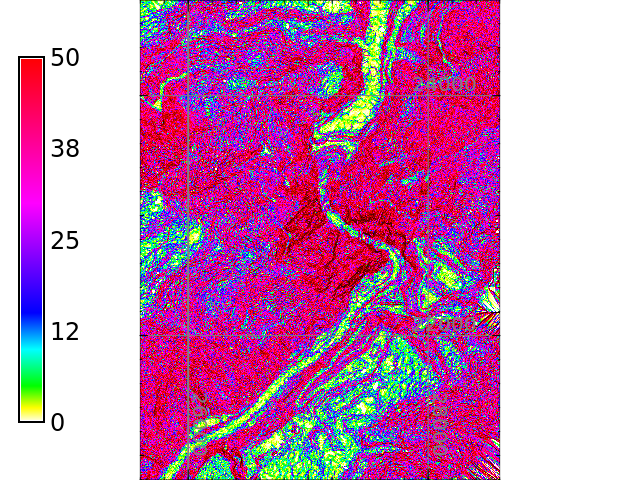

In [21]:
# display hillslope map 
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/topog_slope.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=2, width=1080, height=720, overwrite=True)
map.read_grass("d.rast", map='topog_slope', bgcolor='white', flags='n')
map.read_grass("d.legend", raster='topog_slope', range='0,50', fontsize='24')[1]
# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

## shaded relief map

In [22]:
# create a shaded relief map from raster DEM
map.relief_map()



shaded relief map completed


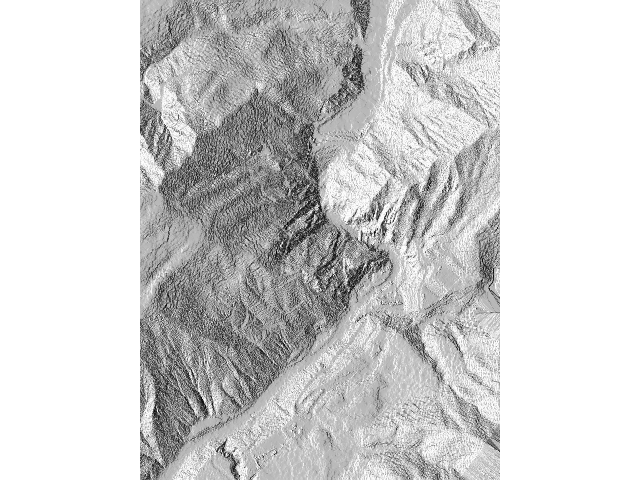

In [23]:
# display shaded relief map 
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/topog_relief.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=4, width=1080, height=720, overwrite=True)
map.read_grass("d.rast", map='topog_relief', bgcolor='white', flags='n')
# show grid and display result
#map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

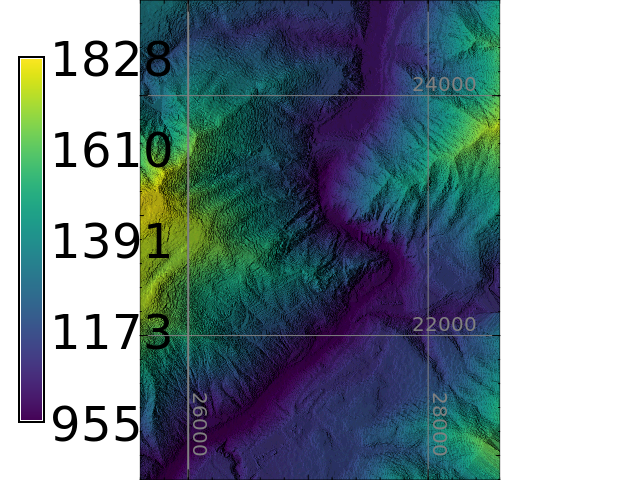

In [24]:
# display shaded relief map 
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/topog_relief.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=4, width=1080, height=720, overwrite=True)
map.read_grass("d.rast", map='topog_relief_color', bgcolor='white', flags='n')
map.read_grass("d.legend", raster='topog_rast_resamp', fontsize='48')[1]
# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

## hydrologic map

In [25]:
# create a hydrologic map from raster DEM
map.hydrology_map()







hydrologic map completed


In [26]:
# report of watershed basins in hydrologic map 
#   topog_basin_vect

# report layers
print(map.read_grass("v.info", map='topog_basin_vect', verbose=True)[0].decode()) 

# report entities 
out = map.read_grass("v.db.select", map='topog_basin_vect')[0].splitlines()
for line in range(0,5):
    print(out[line])

# report categories 
print('\n')
print(map.read_grass("v.category", input='topog_basin_vect', layer='-1', option='report', verbose=True)[0].decode()) 

# report coordinatesin 
#   adjust range as desired
out = map.read_grass("v.report", map='topog_basin_vect', layer='-1', option='coor', verbose=True)[0].splitlines()
for line in range(0,1):
    print(out[line])

# report on attributes stored in grass sqlite database
print('\n')
print(map.read_grass("v.db.connect", map='topog_basin_vect', flags='c', verbose=True)[0].decode()) 

 +----------------------------------------------------------------------------+
 | Name:            topog_basin_vect                                          |
 | Mapset:          PERMANENT                                                 |
 | Location:        RogunHPP                                                  |
 | Database:        /home/kaelin_joseph/projects/RogunHPP//grassdata          |
 | Title:                                                                     |
 | Map scale:       1:1                                                       |
 | Name of creator: kaelin_joseph                                             |
 | Organization:                                                              |
 | Source date:     Thu Jan 31 14:07:41 2019                                  |
 | Timestamp (first layer): none                                              |
 |----------------------------------------------------------------------------|
 | Map format:      native              

In [27]:
# extract boundaries from watershed vector data as polylines 
# https://grass.osgeo.org/grass77/manuals/v.extract.html
#   if you want to extract boundaries (which are usually without category, 
#   as that information is normally held in the area's centroid) 
#   you must first use v.category to add them, or use layer=-1.
n,s,e,w = 24797, 20796, 28600, 25597  #bounds of topog
g.region(n=n,s=s,e=e,w=w, res=res)
map.read_grass("v.extract", input='topog_basin_vect', type='boundary', layer='-1',
               overwrite=True, output='watershed_vect') 

('',
 'WARNING: Vector map <watershed_vect> already exists and will be overwritten\nExtracting features...\n   2%\x08\x08\x08\x08\x08   5%\x08\x08\x08\x08\x08   8%\x08\x08\x08\x08\x08  11%\x08\x08\x08\x08\x08  14%\x08\x08\x08\x08\x08  17%\x08\x08\x08\x08\x08  20%\x08\x08\x08\x08\x08  23%\x08\x08\x08\x08\x08  26%\x08\x08\x08\x08\x08  29%\x08\x08\x08\x08\x08  32%\x08\x08\x08\x08\x08  35%\x08\x08\x08\x08\x08  38%\x08\x08\x08\x08\x08  41%\x08\x08\x08\x08\x08  44%\x08\x08\x08\x08\x08  47%\x08\x08\x08\x08\x08  50%\x08\x08\x08\x08\x08  53%\x08\x08\x08\x08\x08  56%\x08\x08\x08\x08\x08  59%\x08\x08\x08\x08\x08  62%\x08\x08\x08\x08\x08  65%\x08\x08\x08\x08\x08  68%\x08\x08\x08\x08\x08  71%\x08\x08\x08\x08\x08  74%\x08\x08\x08\x08\x08  77%\x08\x08\x08\x08\x08  80%\x08\x08\x08\x08\x08  83%\x08\x08\x08\x08\x08  86%\x08\x08\x08\x08\x08  89%\x08\x08\x08\x08\x08  92%\x08\x08\x08\x08\x08  95%\x08\x08\x08\x08\x08  98%\x08\x08\x08\x08\x08 100%\x08\x08\x08\x08\x08\nBuilding topology for vector map <waters

In [28]:
# # cleaning of polyline - simplification (reduces vertices)
# #   does not have visible effect
# print(map.read_grass("v.generalize", input='watershed_vect', 
#                     method='douglas_reduction', reduction=10.0, threshold=100.0, 
#                     output='watershed_vect_')[1].decode())

# # cleaning of polyline - smoothing (interpolates new vertices along input polyline)
# #   does not have visible effect
# print(map.read_grass("v.generalize", input='watershed_vect', layer='-1', type='boundary',
#                     method='hermite', threshold=10, angle_thresh=20, verbose=True,
#                     output='watershed_vect_')[1].decode())

In [29]:
# cleaning of polyline - smoothing (interpolates new vertices along input polyline)
#  works (visible smoothing)
print(map.read_grass("v.clean", input='watershed_vect', 
                    tool='prune,break,snap,rmdangle,rmdupl,rmbridge,chbridge,bpol', threshold=30, 
                    output='watershed_vect_')[1].decode()) 

--------------------------------------------------
Tool: Threshold
Prune: 30
Break: 0
Snap vertices: 0
Remove dangles: 0
Remove duplicates: 0
Remove bridges: 0
Change type of boundary bridges: 0
Break polygons: 0
--------------------------------------------------
         overwritten
Copying features...
   2%   5%   8%  11%  14%  17%  20%  23%  26%  29%  32%  35%  38%  41%  44%  47%  50%  53%  56%  59%  62%  65%  68%  71%  74%  77%  80%  83%  86%  89%  92%  95%  98% 100%
Rebuilding parts of topology...
Building topology for vector map <watershed_vect_@PERMANENT>...
Registering primitives...
111 primitives registered
25566 vertices registered
Building areas...
   0%   2%   4%   6%   8%  10%  12%  14%  16%  18%  20%  22%  24%  26%  28%  30%  

In [30]:
# # report of watershed basins in hydrologic map 
# #   topog_basin_vect_

# # report layers
# print(map.read_grass("v.info", map='watershed_vect_', verbose=True)[0].decode()) 

# # report entities 
# out = map.read_grass("v.db.select", map='watershed_vect_')[0].splitlines()
# for line in range(0,0):
#     print(out[line])

# # report categories 
# print('\n')
# print(map.read_grass("v.category", input='watershed_vect_', layer='-1', option='report', verbose=True)[0].decode()) 

# # report coordinatesin 
# #   adjust range as desired
# out = map.read_grass("v.report", map='watershed_vect_', layer='-1', option='coor', verbose=True)[0].splitlines()
# for line in range(0,1):
#     print(out[line])

# # report on attributes stored in grass sqlite database
# print('\n')
# print(map.read_grass("v.db.connect", map='watershed_vect_', flags='c', verbose=True)[0].decode())

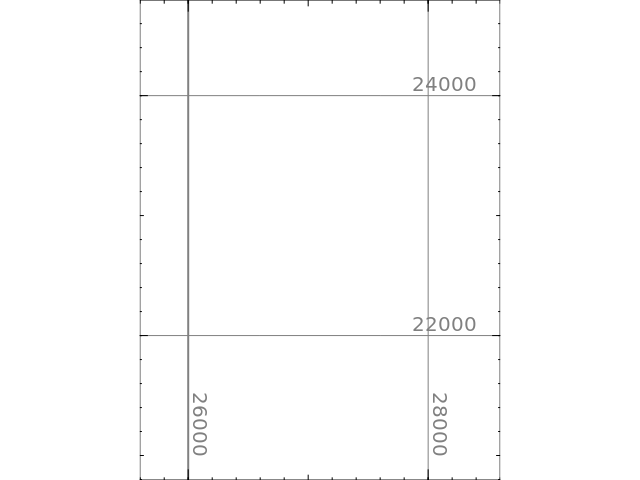

In [31]:
# display watersheds 
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/topog_hydrology.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=2, width=1080, height=720, overwrite=True)
# # display watershed basin boundaries
# map.read_grass('d.vect', map="topog_basin_vect", type="boundary",  width=1)

map.read_grass('d.vect', map="watershed_vect_", width=1, color='red',)
map.read_grass('d.vect', map="watershed_vect", width=1)

# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

In [32]:
# write watershed boundaries as polylines (boundaries) to data file
#   topog_basin_vect
# request from Pascal M. 2018.09.26

# # set grass region for csv output of DEM 
# Easting: From Riverbed (27100) to ca. 28000  #from Pascal M. 2018.09.27 email
# Northing: From Dam foot (22400) to Watershed (23800?)  #from Pascal M. 2018.09.27 email
# g.region(n,s,e,w)
# g.region(n=23800, s=22400, e=28000, w=27100, res=10)

# write watershed vector data to csv using "v.out.ogr"
# map.read_grass("v.out.ogr", input='topog_basin_vect', type='area', verbose=True, #flags='c', 
#                overwrite=True, output=watershedsCSV, format='CSV')  #doesn't work (yet)

# write watershed vector data to wkt using "v.out.ascii"
# map.read_grass("v.out.ascii", input='topog_basin_vect', ##layer='-1', type='centroid', verbose=True, 
#                overwrite=True, output=watershedsCSV, format='wkt')  #works for me, works for Pascal M.

# write watershed vector data to dxf using "v.out.ogr" 
# map.read_grass("v.out.ogr", input='topog_basin_vect', ##type='area', verbose=True, #flags='c', 
#                overwrite=True, output=watershedsDXF, format='DXF')  #works for me

# write watershed vector data to dxf using "v.out.ogr" 
map.read_grass("v.out.ogr", input='watershed_vect_', flags='c', type='boundary', verbose=True,  
               overwrite=True, output=watershedsDXF, format='DXF')  #works for me


# set grass region back to region specified for project
#  will need rework when region definition moved to API class constructor                            #ToDo JK
##n,s,e,w = 24797, 20796, 28600, 25597  #bounds of topog
##g.region(n=n,s=s,e=e,w=w, res=res)

('',
 "WARNING: 44 areas found, but not requested to be exported. Verify 'type'\n         parameter.\nWARNING: No attribute table found -> using only category numbers as\n         attributes\nERROR 1: DXF layer does not support arbitrary field creation, field 'cat' not created.\nExporting 113 features...\n   5%\x08\x08\x08\x08\x08  11%\x08\x08\x08\x08\x08  17%\x08\x08\x08\x08\x08  23%\x08\x08\x08\x08\x08  29%\x08\x08\x08\x08\x08  35%\x08\x08\x08\x08\x08  41%\x08\x08\x08\x08\x08  47%\x08\x08\x08\x08\x08  53%\x08\x08\x08\x08\x08  59%\x08\x08\x08\x08\x08  65%\x08\x08\x08\x08\x08  71%\x08\x08\x08\x08\x08  77%\x08\x08\x08\x08\x08  83%\x08\x08\x08\x08\x08  89%\x08\x08\x08\x08\x08  95%\x08\x08\x08\x08\x08 100%\x08\x08\x08\x08\x08\n113 features without category were written\nv.out.ogr complete. 113 features (Line String type) written to\n<watershed_vect_> (DXF format).\n")

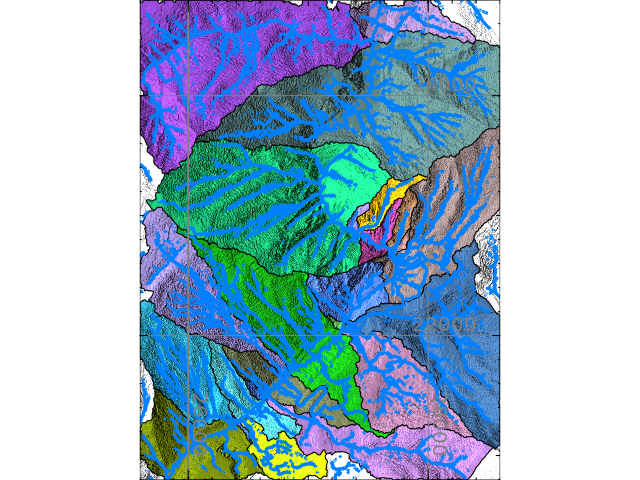

In [33]:
# display hydrologic map 
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/topog_hydrology.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=2, width=1080, height=720, overwrite=True)
# display shaded relief map with watershed basins
map.read_grass('d.his', hue="topog_basin", intensity="topog_relief", brighten="40")[0]
# display watershed basin boundaries
map.read_grass('d.vect', map="topog_basin_vect", type="boundary",  width=1)
# display streams calculated from accumulation
map.read_grass("d.vect", map='topog_accum_vect', verbose=True, bgcolor='white', 
              color='indigo', width=3)[0]
# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

## project layout map

In [34]:
# bounds oproject layout map 
# interpreted from grid on project layout pdf
#n,s,e,w = 24797, 20796, 28600, 25597  #bounds of topog
n,s,e,w = 25020, 20880, 28490, 26040  #project layout
g.region(n=n,s=s,e=e,w=w, res=res)

Module('g.region')

In [35]:
# import PNG image with project layout into grass as raster image
map.layout_map(layoutPDF, dbg=0)






layout map completed


In [36]:
# adjust geolocated map position based on visual inspection
map.read_grass("r.region", map='layout_rast_rgb', verbose=True, 
                     n='n-5',s='s-5')[0]

''

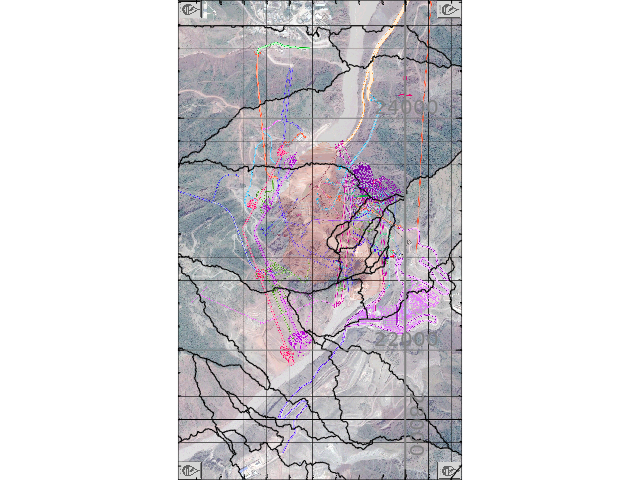

In [37]:
# display project layout map 
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/layout_rast.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=2, width=1080, height=720, overwrite=True)
map.read_grass("d.rast", map='layout_rast_rgb', bgcolor='white', flags='n')
# display watershed basin boundaries
map.read_grass('d.vect', map="topog_basin_vect", type="boundary",  width=1)
# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

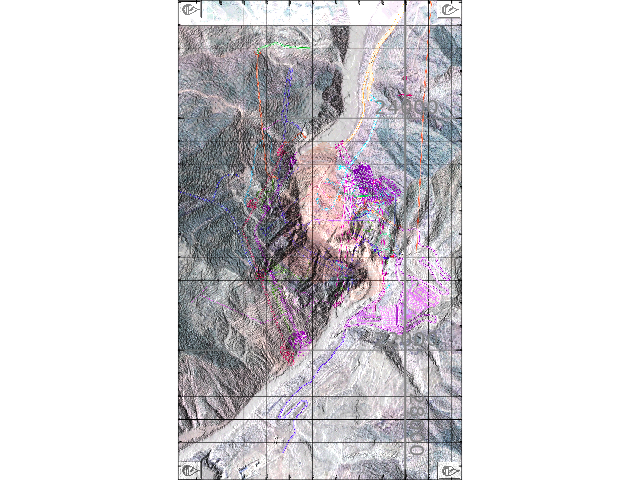

In [38]:
# display project layout on shaded relief map 
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/layout_rast2.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=2, width=1080, height=720, overwrite=True)
# display shaded relief map with watershed basins
map.read_grass('d.his', hue="layout_rast_rgb", intensity="topog_relief", brighten="40")[0]
# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

## geological map

In [39]:
# bounds of geological map
# note that no grid is shown on geological map, bounds were guestimated and adjusted visually
# that geological map is indicated to as oriented to grid north, visually it seems to be slightly rotated

# can different bounds [topg, layot, geology] be put into mapsets? or json?                          #ToDo JK                                    
n,s,e,w = 24200, 22500, 28550, 27000
g.region(n=n,s=s,e=e,w=w, res=res)

Module('g.region')

In [40]:
# import PNG image with project layout into grass as raster image
# make this a separate method and separate raster layer                                              #ToDo JK
map.layout_map(geologyPDF, dbg=0)






layout map completed


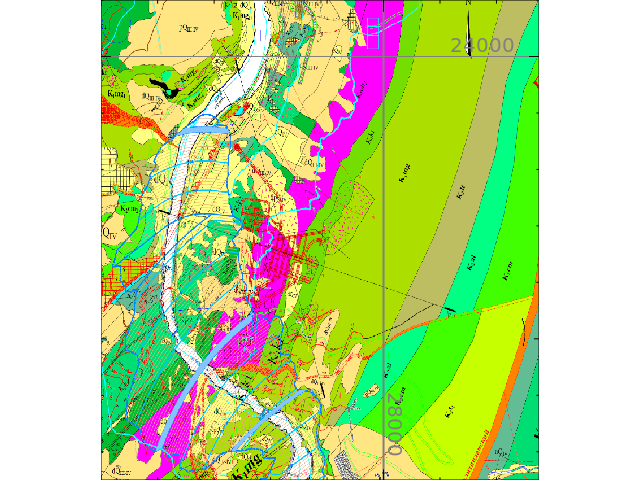

In [41]:
# display project layout map 
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/layout_rast.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=2, width=1080, height=720, overwrite=True)
map.read_grass("d.rast", map='layout_rast_rgb', bgcolor='white', flags='n')
# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

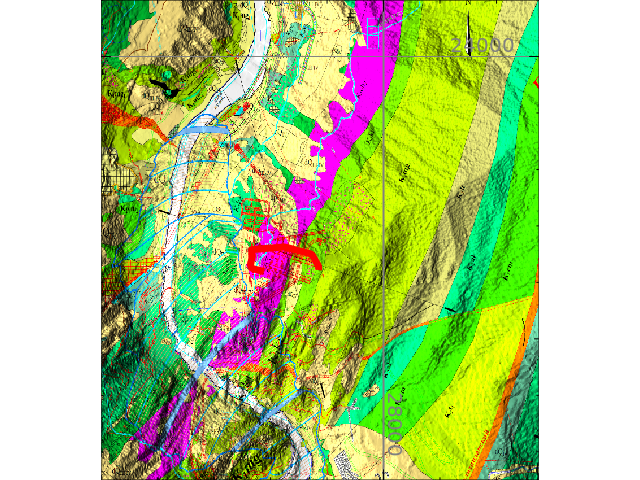

In [42]:
# display project layout on shaded relief map 
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/layout_rast2.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=2, width=1080, height=720, overwrite=True)
# display shaded relief map with watershed basins
map.read_grass('d.his', hue="layout_rast_rgb", intensity="topog_relief", brighten="30")[0]

# display Drainage Gallery DG3 alignment
alignment_vect_clean = 'alignment_dg3_cleaned'
map.read_grass('d.vect', map='alignment_dg3_cleaned', color='red', width=7)

# display streams calculated from accumulation
#map.read_grass("d.vect", map='topog_accum_vect', verbose=True, bgcolor='white', 
#              color='indigo', width=3)[0]

# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

## larger scale layout maps for siting studies

In [43]:
# zoom in on Left Bank
n,s,e,w = 24000, 22900, 28100, 27000
g.region(n=n,s=s,e=e,w=w, res=res)

Module('g.region')

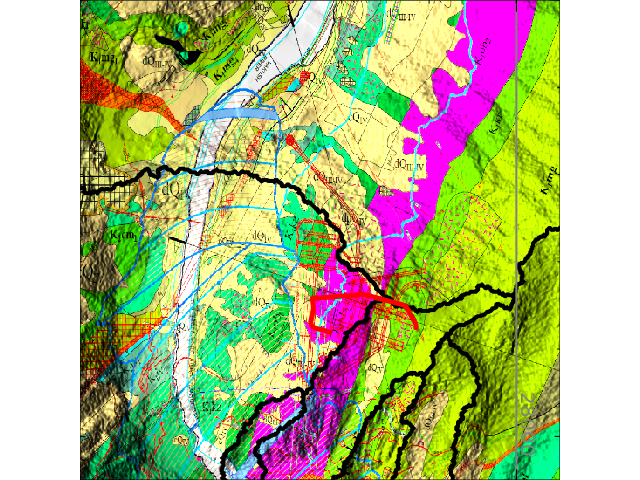

In [44]:
# display zoomed project layout on shaded relief map 
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/layout_rast2.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=2, width=1080, height=720, overwrite=True)
# display shaded relief map with watershed basins
map.read_grass('d.his', hue="layout_rast_rgb", intensity="topog_relief", brighten="30")[0]

# display watershed basin boundaries
map.read_grass('d.vect', map="topog_basin_vect", type="boundary",  width=4)
# display Drainage Gallery DG3 alignment
alignment_vect_clean = 'alignment_dg3_cleaned'
map.read_grass('d.vect', map='alignment_dg3_cleaned', color='red', width=5)

# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

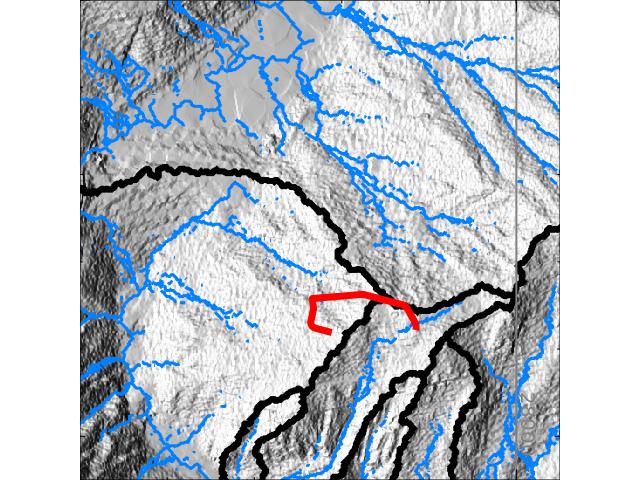

In [45]:
# display zoomed shaded relief map with streams from hydrologic analysis
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/topog_relief.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=4, width=1080, height=720, overwrite=True)
map.read_grass("d.rast", map='topog_relief', bgcolor='white', flags='n')
# display streams calculated from accumulation
map.read_grass("d.vect", map='topog_accum_vect', verbose=True, bgcolor='white', 
              color='indigo', width=3)[0]
# display watershed basin boundaries
map.read_grass('d.vect', map="topog_basin_vect", type="boundary",  width=6)

# display Drainage Gallery DG3 alignment
alignment_vect_clean = 'alignment_dg3_cleaned'
map.read_grass('d.vect', map='alignment_dg3_cleaned', color='red', width=7)

# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

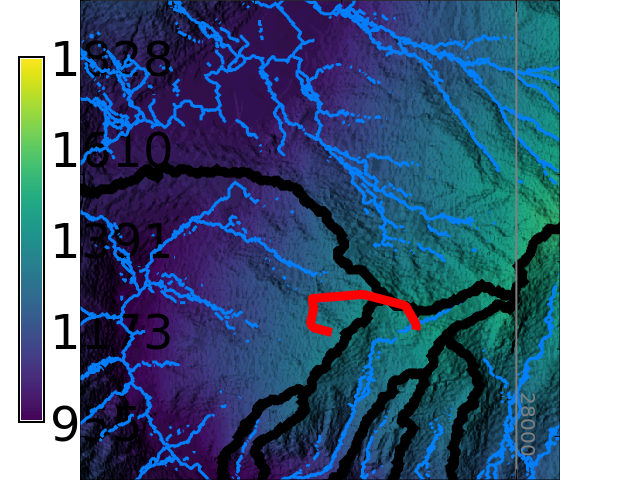

In [46]:
# figure for Addendum to Water-tightening report

# display zoomed shaded relief map with streams from hydrologic analysis
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/topog_relief.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=4, width=1080, height=720, overwrite=True)

#map.read_grass("d.rast", map='topog_relief', bgcolor='white', flags='n')
map.read_grass("d.rast", map='topog_relief_color', bgcolor='white', flags='n')
map.read_grass("d.legend", raster='topog_rast_resamp', fontsize='48')[1]

# display streams calculated from accumulation
map.read_grass("d.vect", map='topog_accum_vect', verbose=True, bgcolor='white', 
              color='indigo', width=3)[0]
# display watershed basin boundaries
map.read_grass('d.vect', map="topog_basin_vect", type="boundary",  width=9)

# display Drainage Gallery DG3 alignment
alignment_vect_clean = 'alignment_dg3_cleaned'
map.read_grass('d.vect', map='alignment_dg3_cleaned', color='red', width=9)

# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

## check topography comparing differences between raster results

In [47]:
!r.in.srtm.region -1 user="" password="" output=testing_srtm_dem

ERROR: This module only operates in LatLong locations


In [48]:
import os
import sys
import subprocess
gisbase = subprocess.check_output(["grass", "--config", "path"]).strip()
os.environ['GISBASE'] = gisbase
os.environ['GRASS_FONT'] = 'sans'
os.environ['GRASS_OVERWRITE'] = '1'  #overwrite existing maps
sys.path.append(os.path.join(gisbase, "etc", "python"))


#!r.in.srtm.region -1
map.read_grass("r.in.srtm.region", flags='l')


('',
 'Creates a DEM from 3 arcsec SRTM v2.1 or 1 arcsec SRTM v3 tiles.\n\nUsage:\n r.in.srtm.region [-n21z] output=name username=value password=value\n   [url=value] [local=name] [region=xmin,ymin,xmax,ymax] [memory=value]\n   [--overwrite] [--help] [--verbose] [--quiet] [--ui]\n\nFlags:\n  -n   Fill null cells\n  -2   Import SRTM v2 tiles\n  -1   Import 1-arcsec tiles (default: 3-arcsec)\n  -z   Create zero elevation for missing tiles\n\nParameters:\n    output   Name for output raster map\n  username   Username for authentication\n  password   Password for authentication\n       url   Base URL to fetch SRTM tiles\n     local   Local folder with SRTM tiles\n    region   Import subregion only (default is current region)\n    memory   Memory in MB for interpolation\n             default: 300\n\nERROR: r.in.srtm.region: Sorry, <l> is not a valid flag\nERROR: Required parameter <output> not set:\n\t(Name for output raster map)\nERROR: Required parameter <username> not set:\n\t(Username f

In [49]:
!g.extension -l

List of available extensions (modules):
d.explanation.plot
d.frame
d.mon2
d.vect.colhist
d.vect.thematic2
db.join
g.cloud
g.compare.md5
g.copyall
g.download.location
g.isis3mt
g.proj.all
g.proj.identify
g.rename.many
i.ann.maskrcnn
i.cutlines
i.cva
i.destripe
i.eb.deltat
i.eb.hsebal95
i.eb.z0m
i.eb.z0m0
i.edge
i.evapo.potrad
i.evapo.senay
i.evapo.zk
i.feotio2
i.fusion.brovey
i.fusion.hpf
i.gcp
i.gravity
i.histo.match
i.image.bathymetry
i.in.probav
i.landsat8.qc
i.landsat8.swlst
i.lmf
i.lswt
i.modis
i.nightlights.intercalibration
i.ortho.corr
i.points.auto
i.pr
i.pysptools.unmix
i.rh
i.rotate
i.segment.gsoc
i.segment.hierarchical
i.segment.stats
i.segment.uspo
i.sentinel
i.signature.copy
i.signature.list
i.signature.remove
i.spec.sam
i.spec.unmix
i.superpixels.slic
i.theilsen
i.variance
i.vi.mpi
i.water
i.wavelet
i.wi
m.gcp.filter
m.printws
r.accumulate
r.agent
r.area
r.basin
r.bioclim
r.bitpattern
r.catchment
r.category.trim
r.cell.area
r.change.info
r.clip
r.colors.contrastbrightness


In [50]:
!r.mapcalc "topog_vect_rast_=(topog_rast_resamp)-(topog_xyz_rast_resamp)"


Invalid map <topog_xyz_rast_resamp>
Parse error
ERROR: parse error


In [51]:
print(map.read_grass("r.univar", map='topog_vect_rast_')[0].decode()) 


In [52]:
# view and check topography
!rm map.png                                                                                 #ToDo JK: pythonize
#map.read_grass("d.rast", map='topog_vect_rast_', verbose=True, bgcolor='white', flags='n',
#             )[0]
map.read_grass("d.rast", map='topog_vect_rast_', verbose=True, bgcolor='white', flags='n',
              values='(-10)-(10)')[0]

rm: cannot remove 'map.png': No such file or directory


''

In [53]:
map.read_grass("d.legend", raster='topog_vect_rast_')[1]
#map.read_grass("d.legend", raster='topog_vect_rast_', range='-10,10')[1]

'ERROR: Raster map <topog_vect_rast_> not found\n'

In [54]:
Image(filename="map.png")

IOError: [Errno 2] No such file or directory: u'map.png'

## extract points from vector data from DXF

In [ ]:
#points_out = map.read_grass("v.to.points", input='topog_vect', output='topog_vect_points') 
#print(points_out[1].decode())

#WARNING: 1565094 features without category in layer <1> skipped. Note that
#         features without category (usually boundaries) are not skipped
#         when 'layer=-1' is given.
# without categories --> seems x,y,z are all missing   !!

points_out = map.read_grass("v.to.points", input='topog_vect', layer=-1, output='topog_vect_points') 
print(points_out[1].decode())

# works (output)

In [ ]:
#print(map.read_grass("v.db.select", map='topog_vect_points', layer=-1)[0].decode()) 


# lots of output, apparently one line for each coordinate ??

In [ ]:
print(map.read_grass("v.info", map='topog_vect_points')[0].decode()) 

In [ ]:
map.read_grass("v.out.ascii", input='topog_vect_points', type='point', layer=-1, separator=',',
              output='data/out/topog_vect_points.csv')

# this works (but includes layers with bad data)
# try with only identified layers with correct contour data   !!

In [ ]:
#print(map.read_grass("g.region", vect='topog_vect_points')[1].decode())  # does not help to display image


In [ ]:
# view and check points
!rm map.png                                                                                 #ToDo JK: pythonize
map.read_grass("d.vect", map='topog_vect_points', color='red')

In [ ]:
Image(filename="map.png")

# no image visible   ??
# image is displayed in qgisp

In [ ]:
map.read_grass("v.to.rast", input='topog_vect_points', use='z', layer=-1, 
             output='topog_vect_points_rast')[0]


In [ ]:
# view and check topography
!rm map.png                                                                                 #ToDo JK: pythonize
map.read_grass("d.rast", map='topog_vect_points_rast')[0]


In [ ]:
Image(filename="map.png")

## extract lines from vector data from DXF

In [ ]:
map.read_grass("v.out.ascii", input='topog_vect', type='line', format='wkt', layer=-1,
              output='data/out/topog_vect_lines.csv')


## convert points to raster data using r.in.xyz

In [ ]:
map.read_grass("r.in.xyz", input='data/out/topog_vect_points.csv', separator=',', zrange='400,2000',
             type='CELL', output='topog_vect_xyz_rast')[1]

# zrange from visual check of original topography


# use also fpr MASK (as first try)
##map.read_grass("r.in.xyz", input='data/out/topog_vect_points.csv', separator=',', zrange='400,2000',
##             type='CELL', output='MASK')[1]

In [ ]:
print(map.read_grass("r.info", map='topog_vect_xyz_rast')[0].decode()) 

In [ ]:
# view and check topography
!rm map.png                                                                                 #ToDo JK: pythonize
map.read_grass("d.rast", map='topog_vect_xyz_rast', verbose=True, bgcolor='red')[1]

In [ ]:
Image(filename="map.png")